<a href="https://colab.research.google.com/github/dsreliete/Womakerscode-DA-desafio_squad/blob/main/Desafio2SquadMaryJackson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Exercício 1.

Leia a base de dados e faça uma análise inicial, como por exemplo, verificar o tamanho da base de dados (quantidade de linhas e colunas) e o tipo das variáveis.

In [46]:
# Lendo os dados
url = 'https://raw.githubusercontent.com/dsreliete/Womakerscode-DA-desafio_squad/main/StudentsPerformance.csv'
df = pd.read_csv(url)

In [47]:
df_notas_alunos = df.copy()

In [48]:
# Lendo as primeiras linhas
df_notas_alunos.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [49]:
# Lendo as últimas linhas
df_notas_alunos.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [50]:
# Verificando o número de linhas e colunas
df_notas_alunos.shape

(1000, 8)

In [51]:
# Verificando quais colunas são numéricas e quais categóricas.
df_notas_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [52]:
# Contando as linhas duplicadas
linhas_duplicadas = df_notas_alunos.duplicated().sum()
print(linhas_duplicadas)

0


In [53]:
# Contando os valores ausentes
valores_ausentes = df_notas_alunos.isna().sum()
print(valores_ausentes)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [54]:
df_notas_alunos.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exercício 2.

Alguma variável precisa ser alterada ou criada? Faça as alterações se julgar necessária.

In [55]:
#criação das variáveis total score e average score
df_students = df.copy()
df_students['total score'] = df_students['math score'] + df_students['reading score'] + df_students['writing score']
df_students['average score'] = df_students['total score'] / 3
df_students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [56]:
#analise dos 50 alunos com melhor nota total
top_50 = df_students.sort_values(by='total score', ascending=False).head(50)
top_50.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000


In [57]:
#método iqr: criação de função
def find_outliers_iqr(dataset, colname):
  q25 = np.quantile(dataset[colname], 0.25)
  q75 = np.quantile(dataset[colname], 0.75)
  iqr = q75 - q25
  cut_off = iqr * 1.5
  lower, upper = q25 - cut_off, q75 + cut_off
  print('O valor de IQR para', {colname}, 'é de', iqr)
  outliers = []

  for i in dataset[colname].values:
    if ((i < lower) or (i > upper)):
      outliers.append(i)
  print('O valor de outliers da', {colname}, 'é de', len(outliers))
  return lower, upper, outliers

O valor de IQR para {'math score'} é de 20.0
O valor de outliers da {'math score'} é de 8


<Figure size 800x800 with 0 Axes>

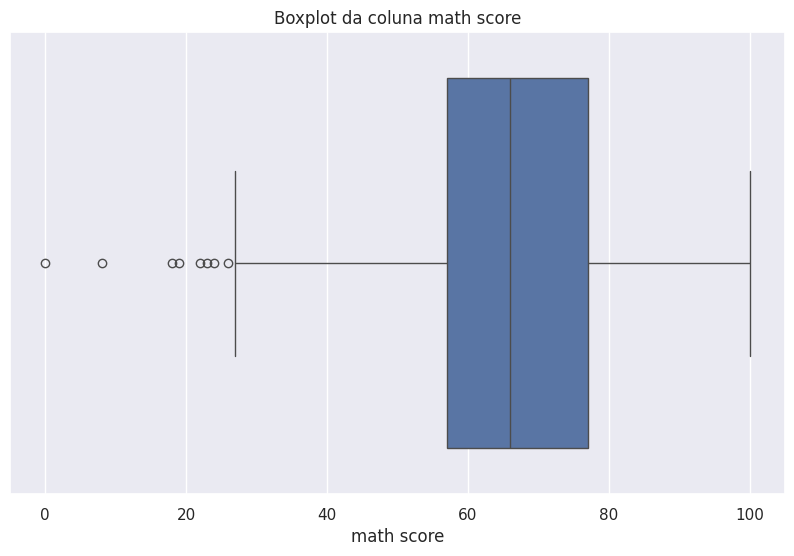

O valor de IQR para {'reading score'} é de 20.0
O valor de outliers da {'reading score'} é de 6


<Figure size 800x800 with 0 Axes>

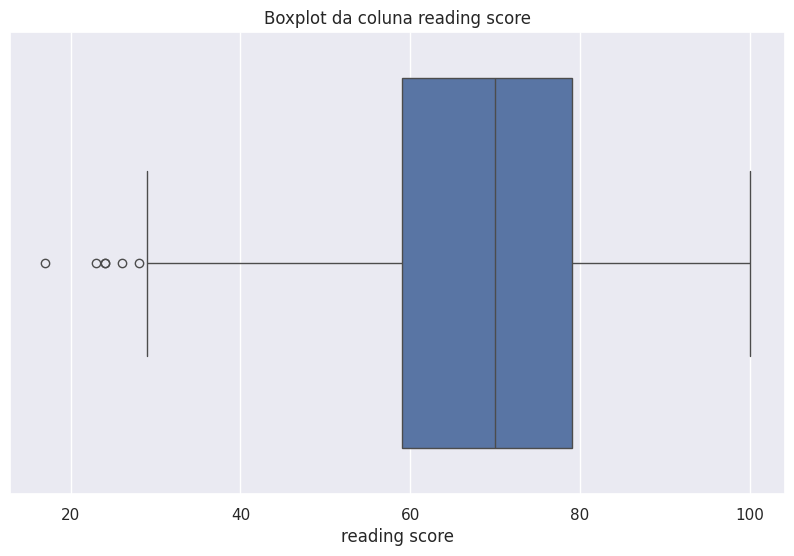

O valor de IQR para {'writing score'} é de 21.25
O valor de outliers da {'writing score'} é de 5


<Figure size 800x800 with 0 Axes>

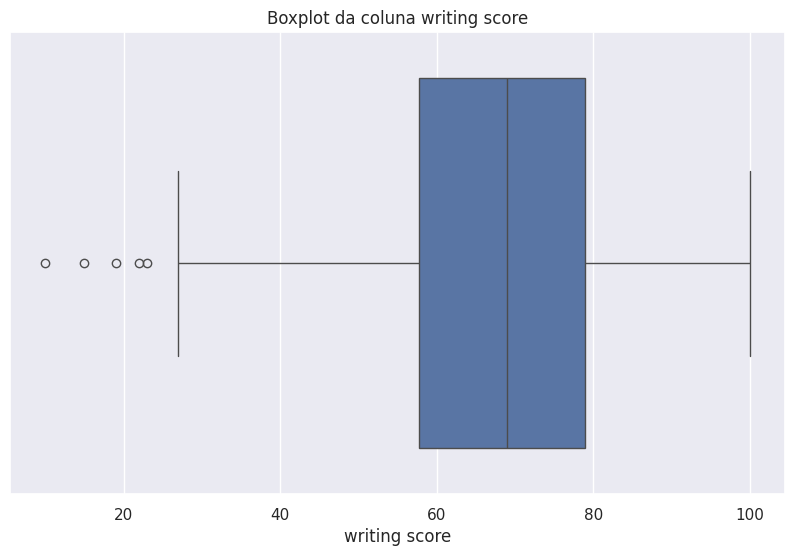

O valor de IQR para {'total score'} é de 58.0
O valor de outliers da {'total score'} é de 6


<Figure size 800x800 with 0 Axes>

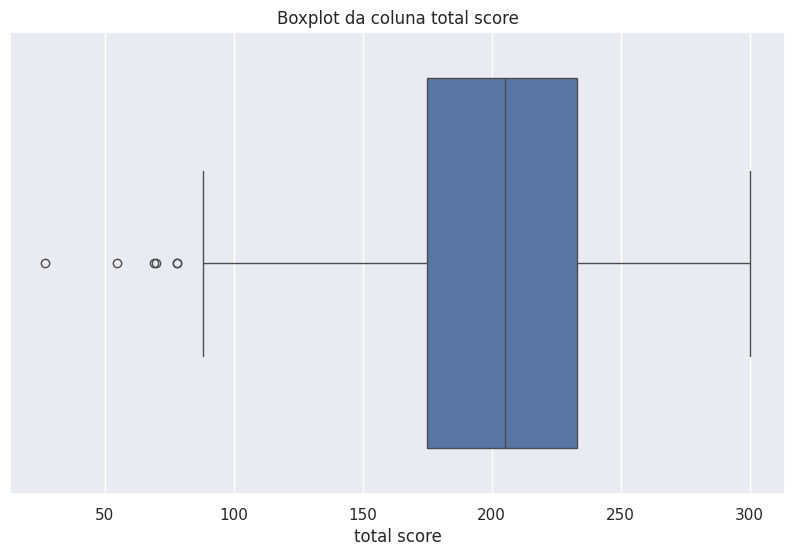

O valor de IQR para {'average score'} é de 19.333333333333336
O valor de outliers da {'average score'} é de 6


<Figure size 800x800 with 0 Axes>

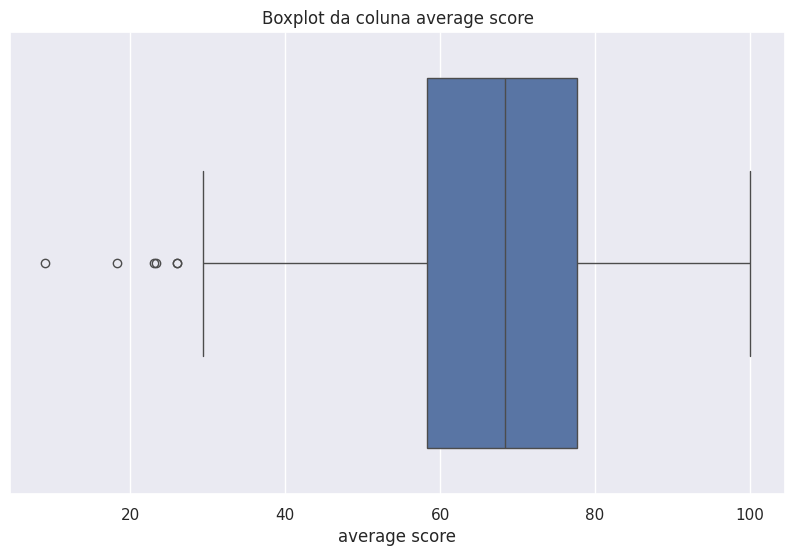

In [58]:
#aplicação do método em gráfico bloxplot para localizar outliers
for column in df_students.select_dtypes(include = np.number).columns:
  lower, upper, outliers = find_outliers_iqr(df_students, column)

  if outliers:
    plt.figure(figsize= (8,8))
    plt.figure()
    sns.boxplot(data = df_students, x = column, showfliers = True)
    plt.title(f'Boxplot da coluna {column}')
    plt.show()

In [59]:
#função para remover os outliers, usando o metodo IQR
def remover_outliers(dataset, colname):
  q25 = np.quantile(dataset[colname], 0.25)
  q75 = np.quantile(dataset[colname], 0.75)
  iqr = q75 - q25
  cut_off = iqr * 1.5
  lower, upper = q25 - cut_off, q75 + cut_off
  outliers = []

  dataset_filtrado = dataset[(dataset[colname] >= lower) & (dataset[colname] <= upper)]
  return dataset_filtrado

In [60]:
#novo dataframe sem outlier
df_students_sem_outlier = df_students.copy()
for column in df_students_sem_outlier.select_dtypes(include=np.number).columns:
    df_students_sem_outlier = remover_outliers(df_students_sem_outlier, column)

In [61]:
#aplicação do método em gráfico bloxplot para localizar outliers
for column in df_students_sem_outlier.select_dtypes(include=np.number).columns:
    lower, upper, outliers = find_outliers_iqr(df_students_sem_outlier, column)

    if outliers:
        plt.figure(figsize=(8, 8))
        sns.boxplot(data=df_students_sem_outlier, x=column, showfliers=True)
        plt.title(f'Boxplot da coluna {column} (Sem Outliers)')
        plt.show()

O valor de IQR para {'math score'} é de 20.0
O valor de outliers da {'math score'} é de 0
O valor de IQR para {'reading score'} é de 20.0
O valor de outliers da {'reading score'} é de 0
O valor de IQR para {'writing score'} é de 21.0
O valor de outliers da {'writing score'} é de 0
O valor de IQR para {'total score'} é de 58.0
O valor de outliers da {'total score'} é de 0
O valor de IQR para {'average score'} é de 19.333333333333336
O valor de outliers da {'average score'} é de 0


Exercício 3.

Verifique a quantidade de alunos em cada grupo racial/ético

In [62]:
# Criando tabela de frequência da variável race/ethnicity

# pd.crosstab: Gera uma tabela de frequência onde a variável race/ethnicity se torna o índice.

pd.crosstab( df_notas_alunos["race/ethnicity"], "count" )

col_0,count
race/ethnicity,
group A,89
group B,190
group C,319
group D,262
group E,140


In [63]:
# Salvando a tabela de frequência em um dataframe, onde a raça/etnia é uma coluna (obs: na saída original do crosstab o grupo de etnia é o nome da linha,
# e não uma coluna)

data_race = pd.crosstab( df_notas_alunos["race/ethnicity"], "count" ).reset_index()
data_race

col_0,race/ethnicity,count
0,group A,89
1,group B,190
2,group C,319
3,group D,262
4,group E,140


<ipython-input-64-166e27adbbde>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="race/ethnicity", y="count", data=data_race, palette="Set2")


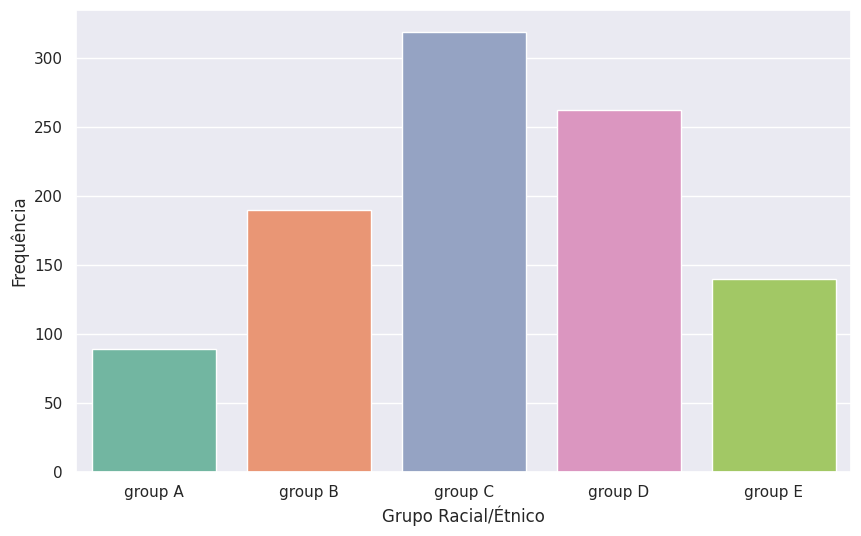

In [64]:
# criando gráfico da quantidade de alunos por grupo racial

# Palette: Isso fará com que cada barra seja colorida de acordo com a paleta escolhida, tornando o gráfico visualmente mais atraente.

sns.barplot(x="race/ethnicity", y="count", data=data_race, palette="Set2")
plt.xlabel("Grupo Racial/Étnico")
plt.ylabel("Frequência")
plt.show()

Exercício 4.

Qual a quantidade de alunos de cada gênero? Existem mais alunos do
gênero masculino ou feminino?

In [65]:
df.value_counts('gender')

,count
gender,
female,518
male,482


In [66]:
# Verificar qual gênero possui maior quantidade de alunos
students_gender = df.value_counts('gender')

diferenca = abs(students_gender['female'] - students_gender['male'])

if students_gender['male'] > students_gender['female']:
    print(f"Existem mais alunos do gênero masculino. {diferenca} alunos a mais.")
else:
    print(f"Existem mais alunos do gênero feminino. {diferenca} alunos a mais. ")

Existem mais alunos do gênero feminino. 36 alunos a mais. 


In [67]:
# Verificar a média das notas por gênero
mean_gender = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().round(2)
print(mean_gender)

        math score  reading score  writing score
gender                                          
female       63.63          72.61          72.47
male         68.73          65.47          63.31


In [68]:
# Verificar relação da média das notas com escolaridade dos pais
mean_parental_level = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().round(2)
print(mean_parental_level)

                             math score  reading score  writing score
parental level of education                                          
associate's degree                67.88          70.93          69.90
bachelor's degree                 69.39          73.00          73.38
high school                       62.14          64.70          62.45
master's degree                   69.75          75.37          75.68
some college                      67.13          69.46          68.84
some high school                  63.50          66.94          64.89


In [69]:
# Verificar a quantidade de alunos por gênero que completaram o curso preparatório
preparation_course_gender = df.groupby(['gender', 'test preparation course']).size().reset_index(name='count')
print(preparation_course_gender)

   gender test preparation course  count
0  female               completed    184
1  female                    none    334
2    male               completed    174
3    male                    none    308


In [70]:
# Verificar a média de notas em relação ao curso preparatório
mean_test_preparation_course = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().round(2)
print(mean_test_preparation_course)

                         math score  reading score  writing score
test preparation course                                          
completed                     69.70          73.89          74.42
none                          64.08          66.53          64.50


Exercício 5.

Analise as notas de matemática dos alunos de forma mais completa
possível.

In [71]:
dflocdatamath = df.describe()
dflocdatamath.loc['median'] = df['math score'].median()
dflocdatamath.loc['var'] = df['math score'].var()
dflocdatamath.loc['amplitude'] = dflocdatamath.loc['max'] - dflocdatamath.loc['min']
dflocdatamath['math score']

,math score
count,1000.000000
mean,66.089000
std,15.163080
min,0.000000
25%,57.000000
50%,66.000000
75%,77.000000
max,100.000000
median,66.000000
var,229.918998


In [72]:
# média de notas de matematica dos alunos pelo grau de escolaridade dos pais.
df.groupby('parental level of education')['math score'].mean()

# mesma analise com mais matérias.
df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


Análises gráficas das sugestões abaixo ou o que achar pertinente:

● Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais?

● Faça a mesma análise para as notas de leitura e escrita.

● Verifique gráficamente a relação da nota de leitura e de escrita.

,math score
parental level of education,
associate's degree,"Axes(0.125,0.11;0.775x0.77)"
bachelor's degree,"Axes(0.125,0.11;0.775x0.77)"
high school,"Axes(0.125,0.11;0.775x0.77)"
master's degree,"Axes(0.125,0.11;0.775x0.77)"
some college,"Axes(0.125,0.11;0.775x0.77)"
some high school,"Axes(0.125,0.11;0.775x0.77)"


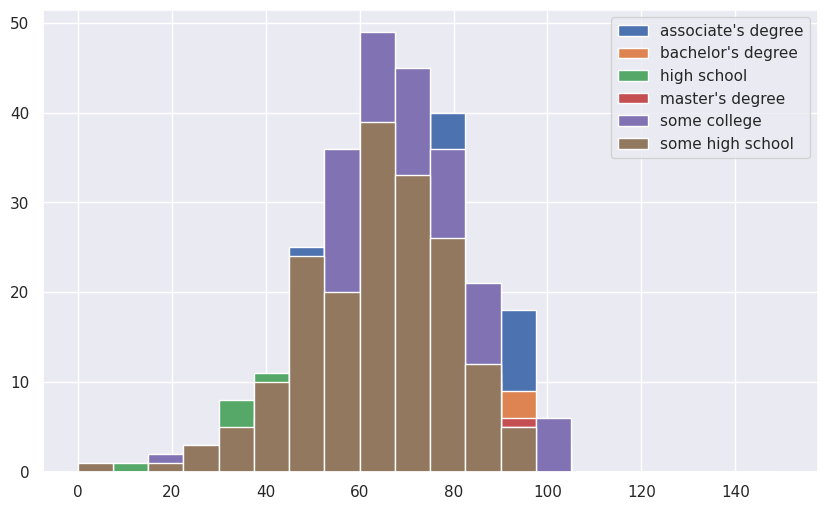

In [73]:
df.groupby('parental level of education')['math score'].hist(bins=20, range=[0, 150], legend=[df.groupby('parental level of education')])

,math score
,reading score
,writing score
parental level of education,
associate's degree,"[[Axes(0.125,0.545217;0.336957x0.334783), Axes..."
bachelor's degree,"[[Axes(0.125,0.545217;0.336957x0.334783), Axes..."
high school,"[[Axes(0.125,0.545217;0.336957x0.334783), Axes..."
master's degree,"[[Axes(0.125,0.545217;0.336957x0.334783), Axes..."
some college,"[[Axes(0.125,0.545217;0.336957x0.334783), Axes..."
some high school,"[[Axes(0.125,0.545217;0.336957x0.334783), Axes..."


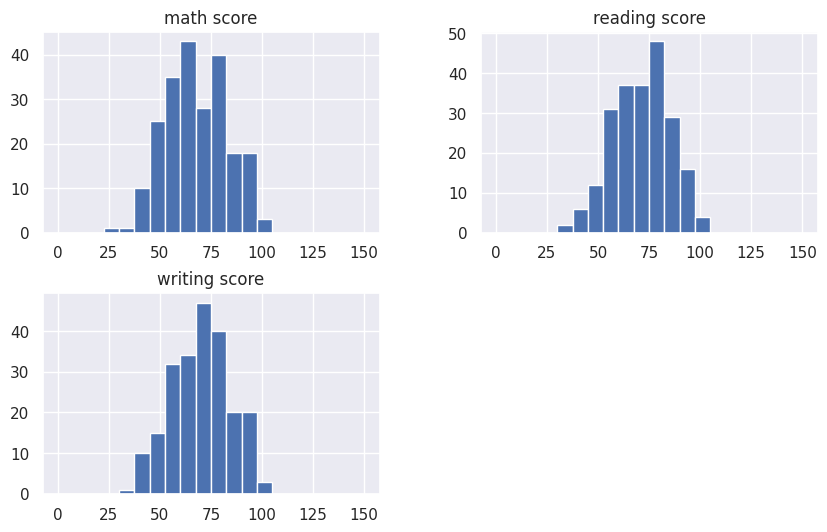

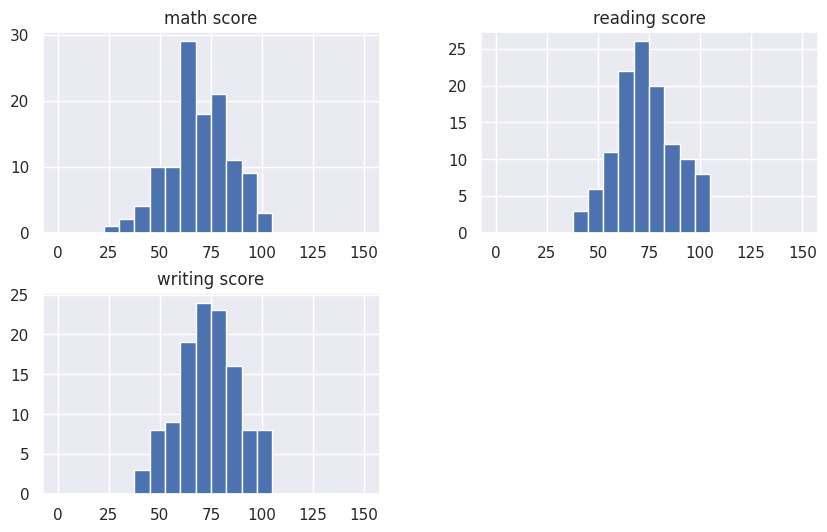

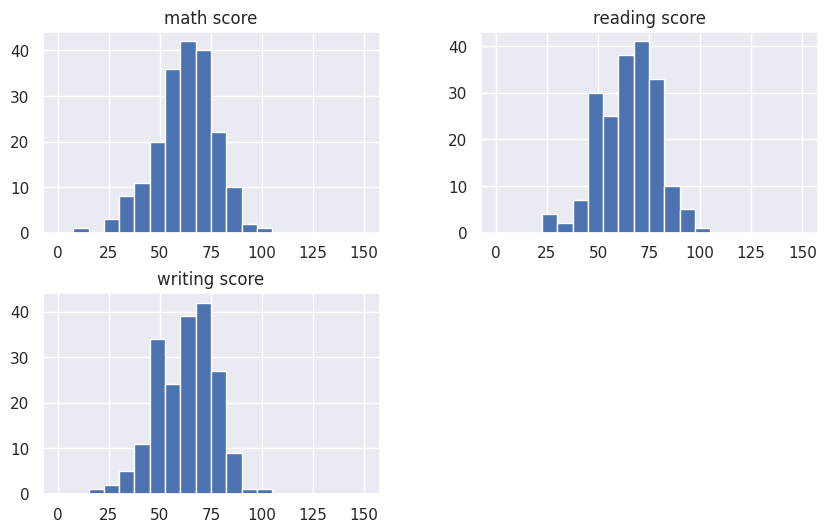

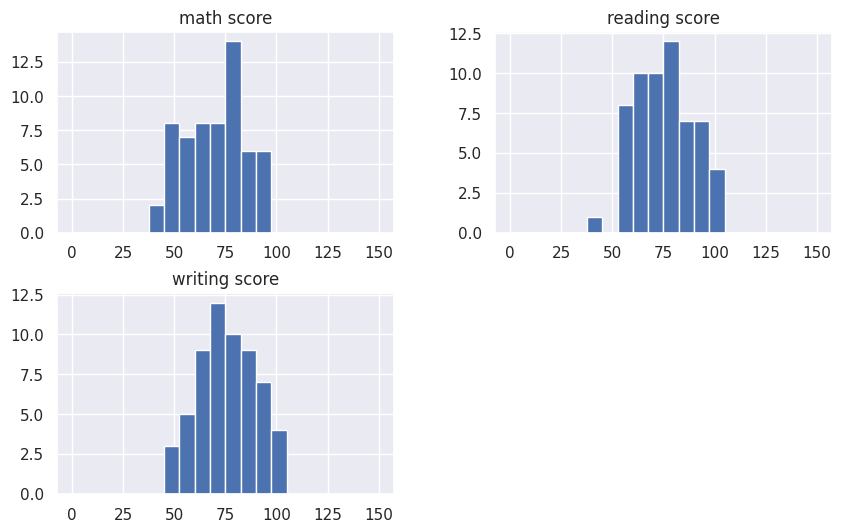

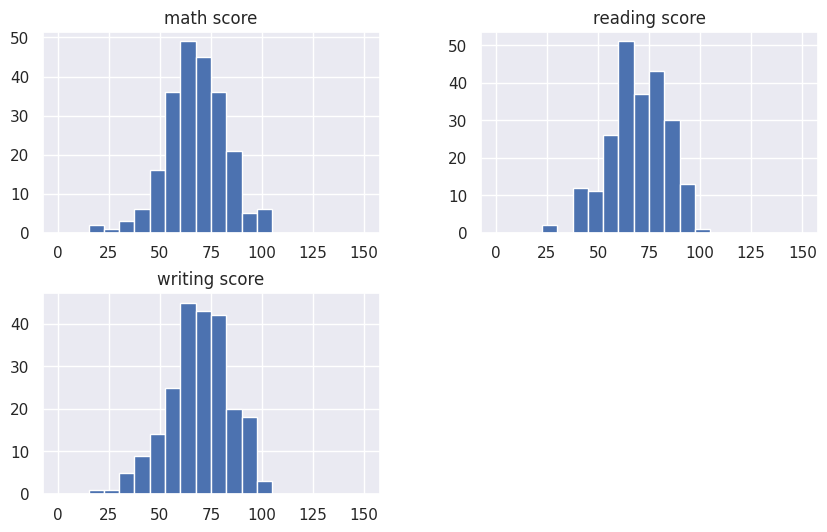

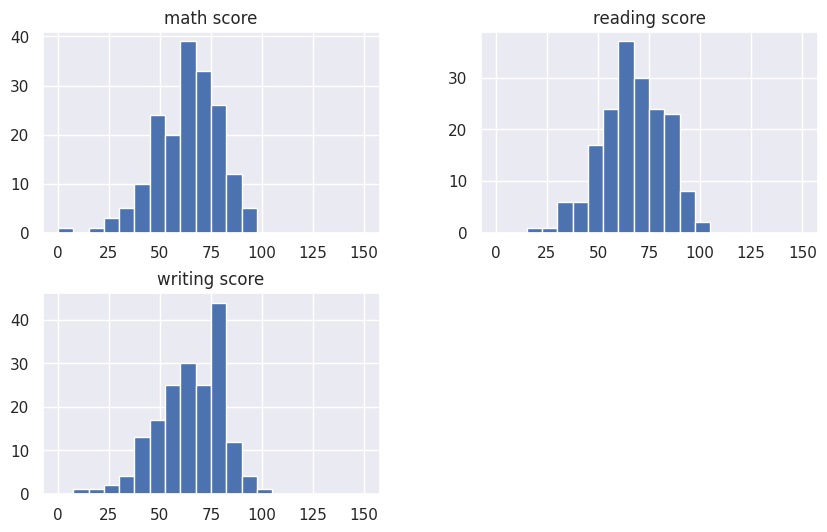

In [74]:
df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].hist(bins=20, range=[0, 150])

<Axes: >

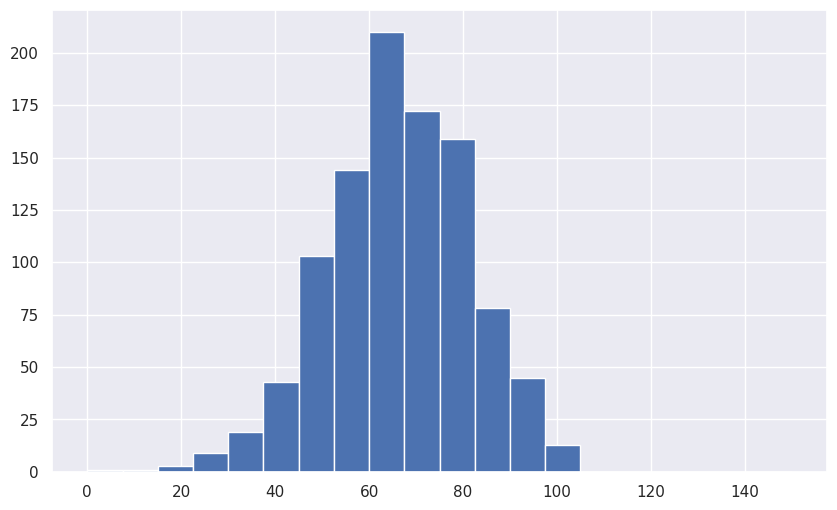

In [75]:
df['math score'].hist(bins=20, range=[0, 150])

array([[<Axes: title={'center': 'reading score'}>,
        <Axes: title={'center': 'writing score'}>]], dtype=object)

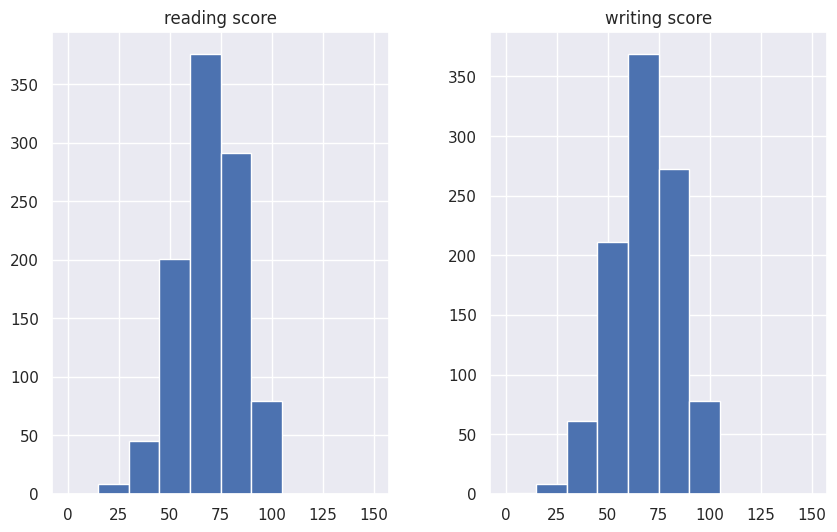

In [76]:
df[['reading score', 'writing score']].hist(range=[0, 150])

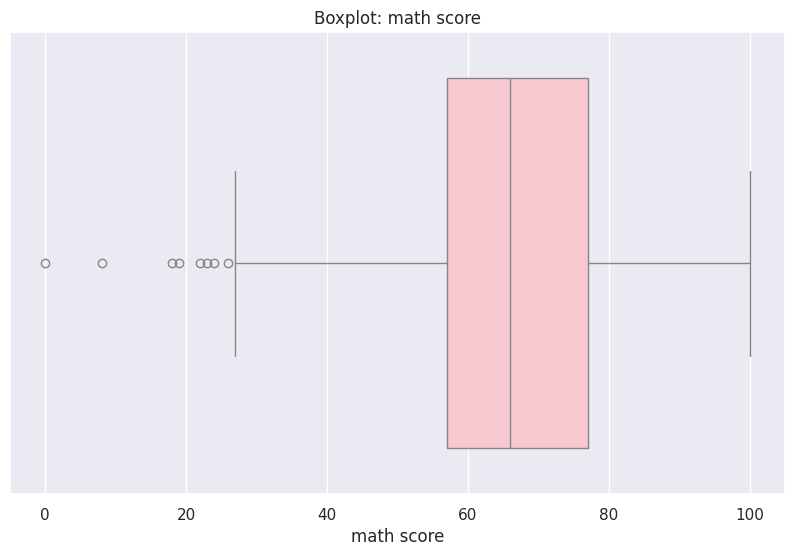

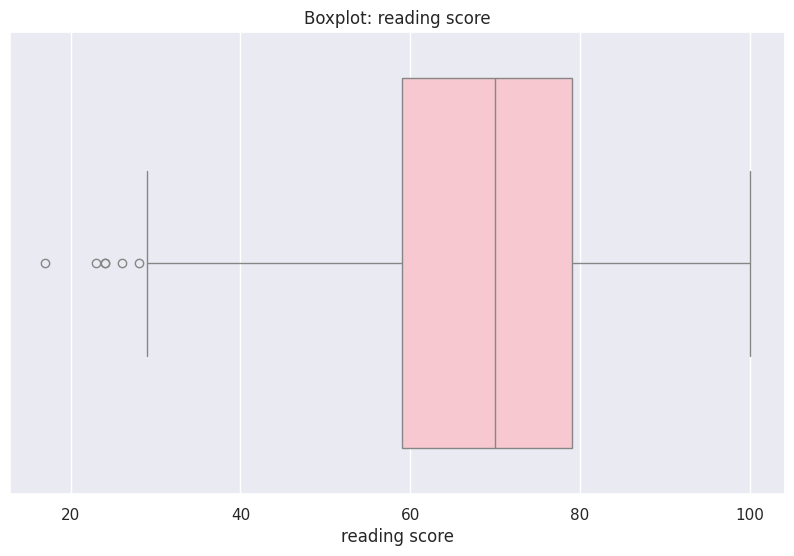

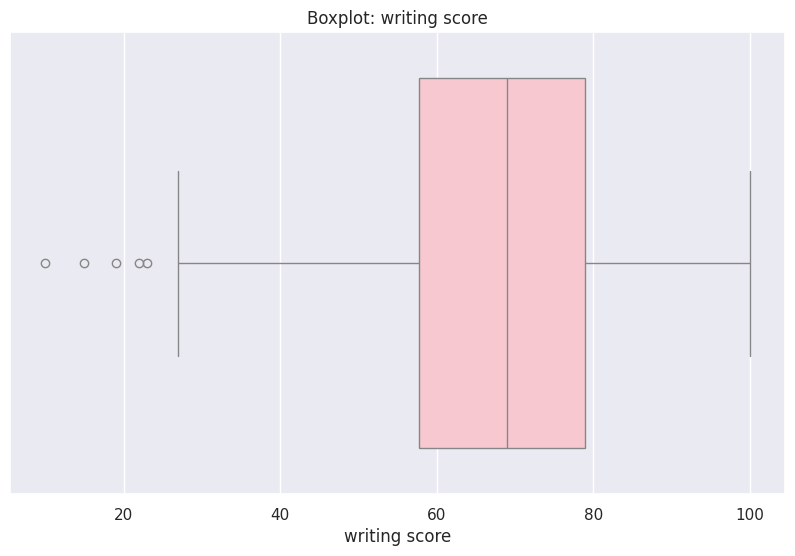

In [77]:
plt.rcParams['figure.figsize'] = [10, 6]
sns.set_theme()

for column in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(data = df , x = column, color='pink',showfliers=True)
    plt.title("Boxplot: "+column)

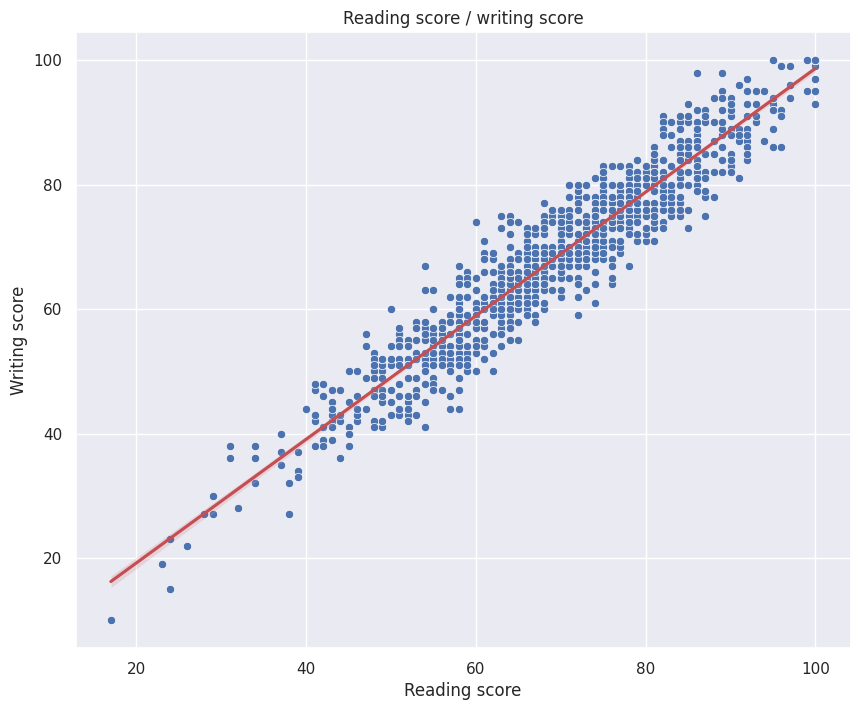

In [78]:
# Verifique gráficamente a relação da nota de leitura e de escrita.

plt.figure(figsize=(10, 8))
sns.scatterplot(x='reading score', y='writing score', data=df_students, marker='o', color='b')
sns.regplot(x='reading score', y='writing score', data=df_students, scatter=False, color='r')
plt.title('Reading score / writing score')
plt.xlabel('Reading score')
plt.ylabel('Writing score')
plt.show()

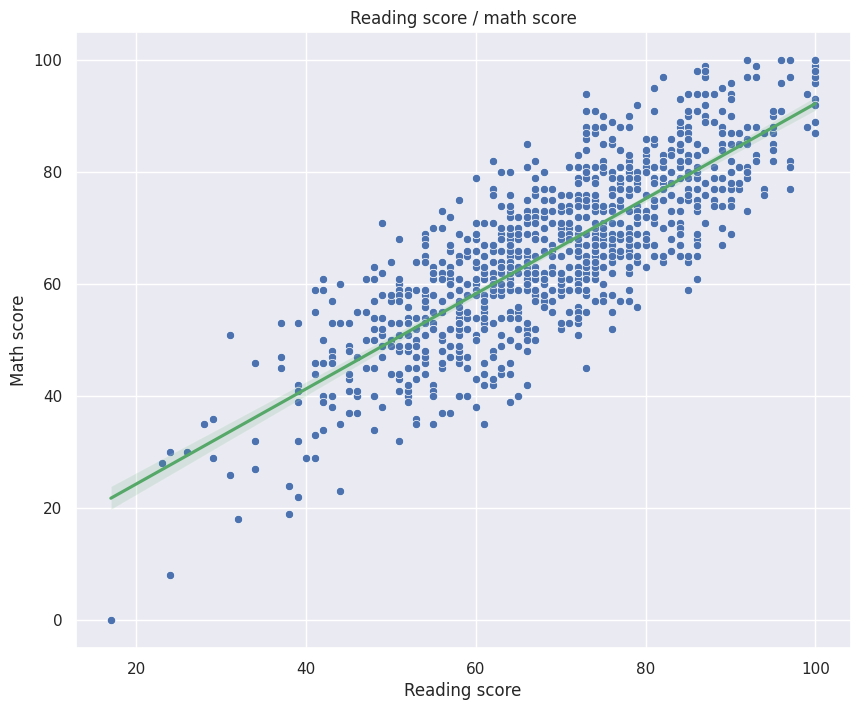

In [79]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='reading score', y='math score', data=df_students, marker='o', color='b')
sns.regplot(x='reading score', y='math score', data=df_students, scatter=False, color='g')
plt.title('Reading score / math score')
plt.xlabel('Reading score')
plt.ylabel('Math score')
plt.show()

Atividade extra:

In [80]:
# Média de notas de cada área por gênero

gender_mean = df.groupby(['gender'])[['math score', 'reading score', 'writing score']].agg(['mean'])
gender_mean

,math score,reading score,writing score
,mean,mean,mean
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


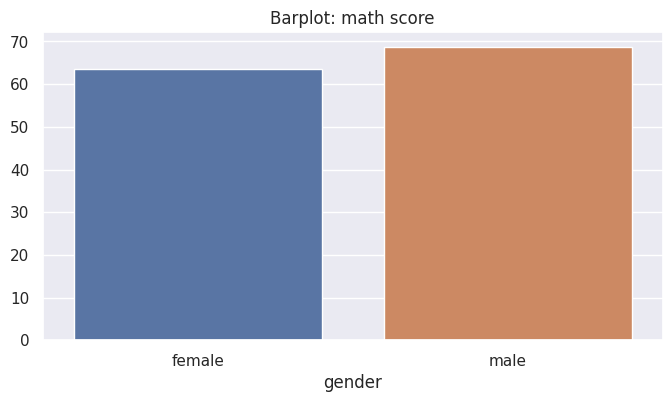

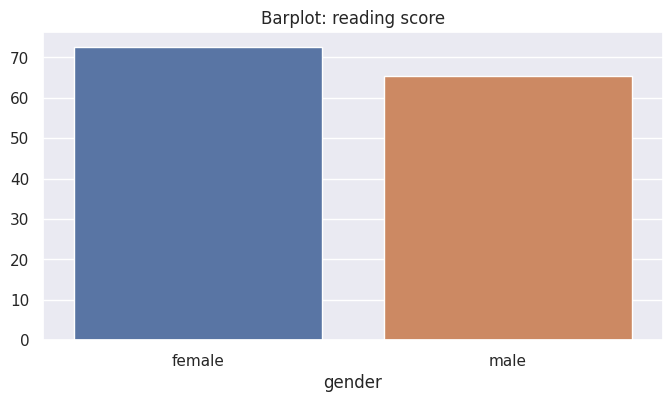

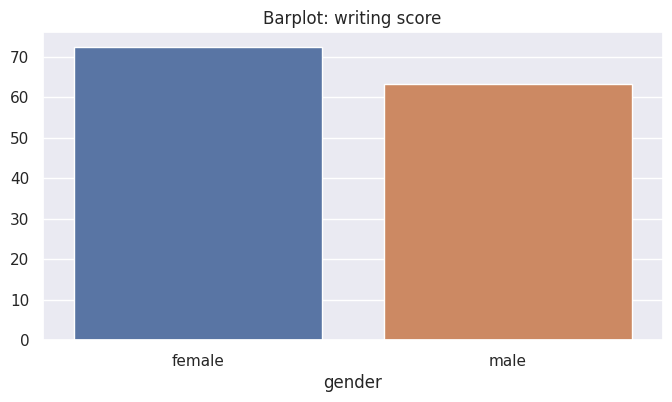

In [81]:
# Gráfico de média das notas de cada área por gênero
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()
for column in gender_mean.select_dtypes(include=np.number).columns:
    plt.figure()
    mean_values = gender_mean[column].values.flatten()
    sns.barplot(data = gender_mean.reset_index(), x = 'gender', y = mean_values, hue = 'gender')
    plt.title("Barplot: "+column[0])

In [82]:
# Média de notas de cada área por raça/etnia

race_mean = df.groupby(['race/ethnicity'])[['math score', 'reading score', 'writing score']].agg(['mean'])
race_mean

,math score,reading score,writing score
,mean,mean,mean
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


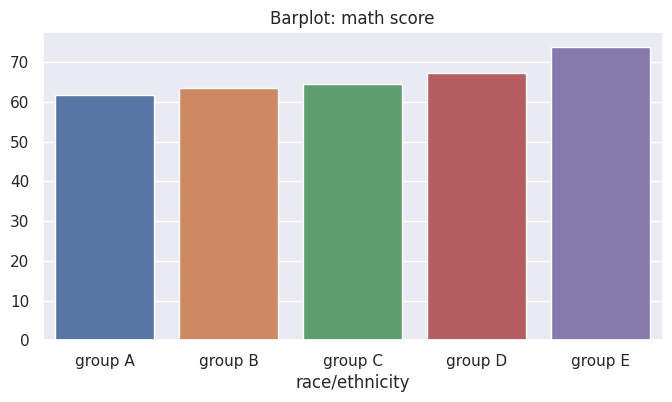

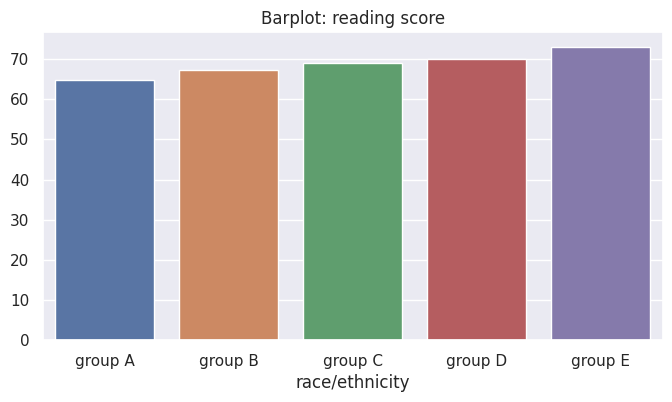

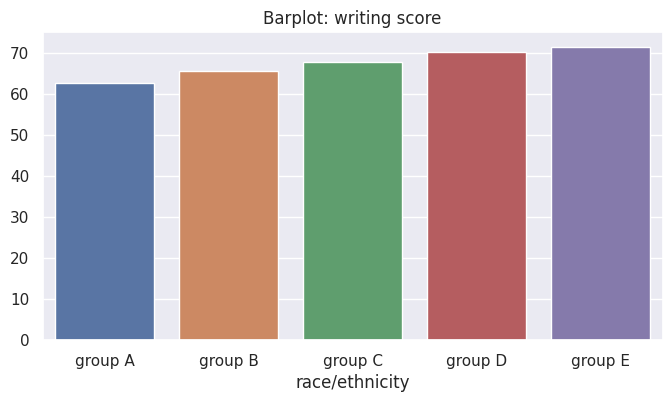

In [83]:
# Gráfico de média de notas de cada área por raça/etnia

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()
for column in race_mean.select_dtypes(include=np.number).columns:
    plt.figure()
    mean_values = race_mean[column].values.flatten()
    sns.barplot(data = race_mean.reset_index(), x = 'race/ethnicity', y = mean_values, hue = 'race/ethnicity')
    plt.title("Barplot: "+column[0])

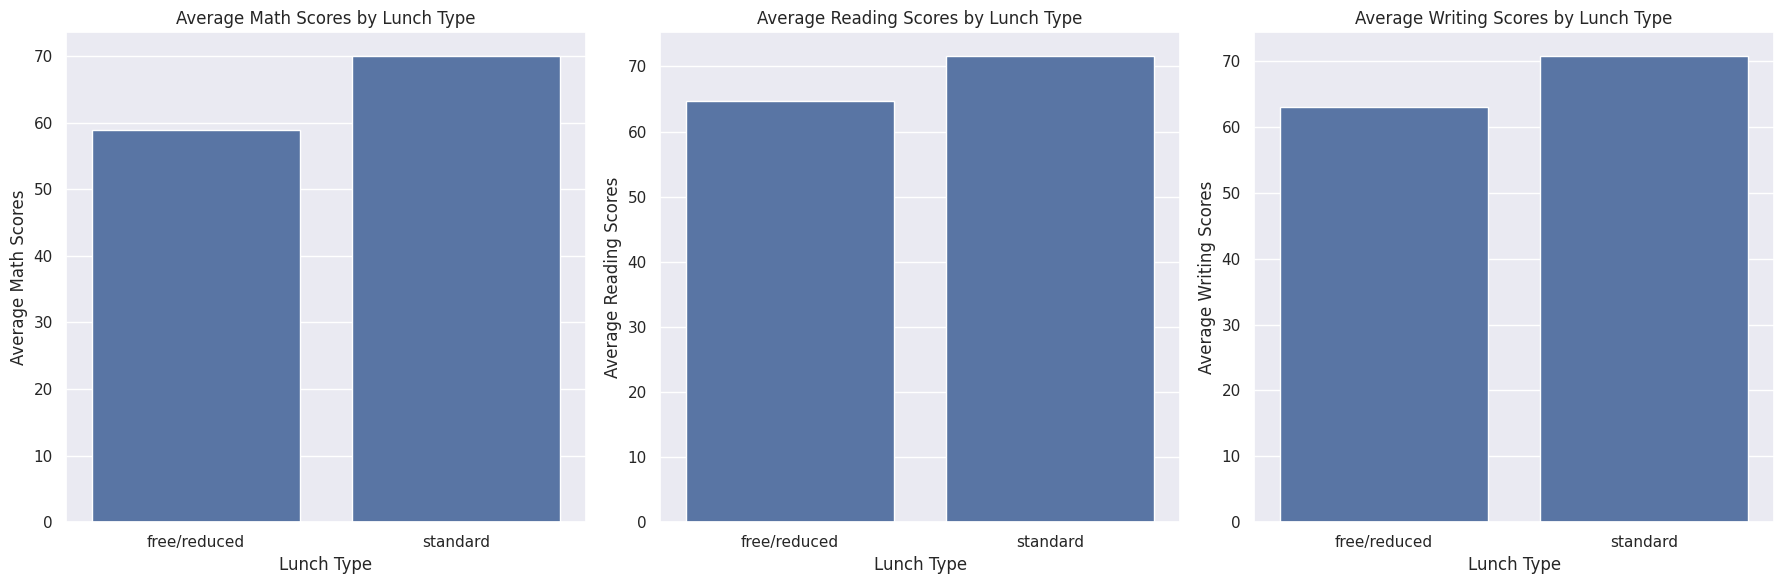


Comparison between students with standard lunch and free/reduced lunch:

Lunch Type: free/reduced
Average Math Scores: 58.92
Average Reading Scores: 64.65
Average Writing Scores: 63.02

Lunch Type: standard
Average Math Scores: 70.03
Average Reading Scores: 71.65
Average Writing Scores: 70.82


In [84]:
# Comparando se o almoço tem influência direta nas notas

# Calcular a média das notas por tipo de almoço
mean_scores_by_lunch = df_students.groupby('lunch').agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean'
}).reset_index()

# Plotar histogramas comparativos
plt.figure(figsize=(18, 6))

# Histograma para as notas de matemática
plt.subplot(1, 3, 1)
sns.barplot(x='lunch', y='math score', data=mean_scores_by_lunch)
plt.title('Average Math Scores by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Average Math Scores')

# Histograma para as notas de leitura
plt.subplot(1, 3, 2)
sns.barplot(x='lunch', y='reading score', data=mean_scores_by_lunch)
plt.title('Average Reading Scores by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Average Reading Scores')

# Histograma para as notas de redação
plt.subplot(1, 3, 3)
sns.barplot(x='lunch', y='writing score', data=mean_scores_by_lunch)
plt.title('Average Writing Scores by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Average Writing Scores')

plt.tight_layout()
plt.show()

# Impressão explicativa dos resultados
print("\nComparison between students with standard lunch and free/reduced lunch:")

for index, row in mean_scores_by_lunch.iterrows():
    print(f"\nLunch Type: {row['lunch']}")
    print(f"Average Math Scores: {row['math score']:.2f}")
    print(f"Average Reading Scores: {row['reading score']:.2f}")
    print(f"Average Writing Scores: {row['writing score']:.2f}")